<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

np.random.seed(0)

In [3]:
# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [4]:
class DataGeneration:

  def __init__(self, name, file_path, seperation_rate, target_position=-1):

    self.name = name

    self.file_path = file_path

    self.seperation_rate = seperation_rate

    if (target_position == -1 or target_position == 0):
      self.target_position = target_position
    else:
      err_str = "target position must be -1 or 0"
      raise Exception(err_str)

    print(self.name, "data generation start!")


  def __display_target_distribution(self, data, str_of_kind='original data'):

    print("===================================================================")

    target_data = data[:,self.target_position] 

    unique, counts = np.unique(target_data, return_counts=True) 

    for i in range(len(unique)):
      print("[DataGeneration] unique number of " + str_of_kind + ' = ', unique[i], 'count = ',counts[i])

    for i in range(len(unique)):
      print("[DataGeneration] unique number of " + str_of_kind + ' = ', unique[i], 'ratio = ',np.round(100*counts[i]/len(target_data),2),'%')
    
    print("===================================================================")


  def generate(self):

    try:
      loaded_data = np.loadtxt(self.file_path, delimiter=',',dtype=np.float32)
    
    except Exception as err:
      print('[DataGeneration::generate()]',str(err))
      raise Exception(str(err))

    print("[DataGeneration] loaded_data.shape = ",loaded_data.shape)

    self.__display_target_distribution(loaded_data,'original data')

    total_data_num = loaded_data.shape[0]
    test_data_num = int(total_data_num * self.seperation_rate)

    np.random.shuffle(loaded_data)

    test_data = loaded_data[0:test_data_num]
    training_data = loaded_data[test_data_num: ]

    self.__display_target_distribution(training_data,'training data')
    self.__display_target_distribution(test_data,'test data')

    return training_data, test_data

In [5]:
class Diabetes:

  def __init__(self, name, input_nodes, hidden_nodes, output_nodes, learning_rate):

    self.name = name

    self.W2 = np.random.rand(input_nodes,hidden_nodes)
    self.b2 = np.random.rand(hidden_nodes)

    self.W3 = np.random.rand(hidden_nodes,output_nodes)
    self.b3 = np.random.rand(output_nodes)

    self.learning_rate = learning_rate

    print(self.name,"is created!!!")


  def feed_forward(self):

    delta = 1e-7

    z2 = np.dot(self.input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    y = a3 = sigmoid(z3)

    return -np.sum(self.target_data*np.log(y+delta) + (1-self.target_data)*np.log((1-y)+delta))


  def predict(self, input_data):

    z2 = np.dot(input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    y = a3 = sigmoid(z3)

    if y >= 0.5:
      result = 1
    else:
      result = 0

    return y, result


  def accuracy(self, input_data, target_data):

    matched_list = []
    unmatched_list = []

    for i in range(len(input_data)):

       (real_val, logical_val) = self.predict(input_data[i])

       if logical_val == target_data[i]:
         matched_list.append(i)
       else:
         unmatched_list.append(i)

    accuracy_result = len(matched_list)/len(input_data)

    return unmatched_list, accuracy_result

  
  def train(self, input_data, target_data):

    self.input_data = input_data
    self.target_data = target_data

    f = lambda x : self.feed_forward()

    self.W2 -= self.learning_rate * numerical_derivative(f,self.W2)
    self.b2 -= self.learning_rate * numerical_derivative(f,self.b2)

    self.W3 -= self.learning_rate * numerical_derivative(f,self.W3)
    self.b3 -= self.learning_rate * numerical_derivative(f,self.b3)

### seperation rate = 0.3 

In [6]:
test_seperation_rate = 0.3
target_position = -1

data_obj = DataGeneration('Diabetes','drive/My Drive/AI_INOVATION_SQUARE/prac/(200309)diabetes.csv',test_seperation_rate,target_position)

(training_data, test_data) = data_obj.generate()

print("======================================================")
print("training data.shape = ",training_data.shape)
print("test data.shape = ",test_data.shape)
print("======================================================")


Diabetes data generation start!
[DataGeneration] loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 count =  263
[DataGeneration] unique number of original data =  1.0 count =  496
[DataGeneration] unique number of original data =  0.0 ratio =  34.65 %
[DataGeneration] unique number of original data =  1.0 ratio =  65.35 %
[DataGeneration] unique number of training data =  0.0 count =  180
[DataGeneration] unique number of training data =  1.0 count =  352
[DataGeneration] unique number of training data =  0.0 ratio =  33.83 %
[DataGeneration] unique number of training data =  1.0 ratio =  66.17 %
[DataGeneration] unique number of test data =  0.0 count =  83
[DataGeneration] unique number of test data =  1.0 count =  144
[DataGeneration] unique number of test data =  0.0 ratio =  36.56 %
[DataGeneration] unique number of test data =  1.0 ratio =  63.44 %
training data.shape =  (532, 9)
test data.shape =  (227, 9)


In [7]:
#hyper_parameter
i_nodes = training_data.shape[1] - 1
h_nodes = 20
o_nodes = 1
lr = 1e-2
epochs = 20

loss_val_list = []
accuracy_val_list = []
validation_accuracy_val_list = []

obj1 = Diabetes('Diabetes', i_nodes, h_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
  
  for i in range(len(training_data)):

    input_data = training_data[i,0:-1]
    target_data = training_data[i,[-1]]

    obj1.train(input_data, target_data)

  cur_loss_val = obj1.feed_forward()

  loss_val_list.append(cur_loss_val)

  (unmatched_list, training_accuracy) = obj1.accuracy(training_data[:,0:-1], training_data[:,-1])

  (unmatched_list, validation_accuracy) = obj1.accuracy(test_data[:,0:-1], test_data[:,-1])

  print("=============================================================================")
  print("step = ", step, "current loss value = ", cur_loss_val,"\n")
  print("step = ", step, "[training data] accuracy value = ",np.round(100*training_accuracy,4),'%')

  accuracy_val_list.append(training_accuracy)

  print("step = ", step, "[validation data] accuracy value = ",np.round(100*validation_accuracy,4),'%')

  validation_accuracy_val_list.append(validation_accuracy)

print("=============================================================================")

end_time = datetime.now()

print("")
print("Elapsed Time => ",end_time-start_time)

Diabetes is created!!!
Neural Network Learning using Numerical Derivative...
step =  0 current loss value =  0.941415889997816 

step =  0 [training data] accuracy value =  65.7895 %
step =  0 [validation data] accuracy value =  63.4361 %
step =  1 current loss value =  0.9098947365871792 

step =  1 [training data] accuracy value =  66.1654 %
step =  1 [validation data] accuracy value =  63.4361 %
step =  2 current loss value =  0.8966728583434534 

step =  2 [training data] accuracy value =  66.1654 %
step =  2 [validation data] accuracy value =  63.4361 %
step =  3 current loss value =  0.8860055177334192 

step =  3 [training data] accuracy value =  65.9774 %
step =  3 [validation data] accuracy value =  64.3172 %
step =  4 current loss value =  0.8770481633721524 

step =  4 [training data] accuracy value =  67.6692 %
step =  4 [validation data] accuracy value =  68.2819 %
step =  5 current loss value =  0.8692596550669492 

step =  5 [training data] accuracy value =  69.1729 %
st

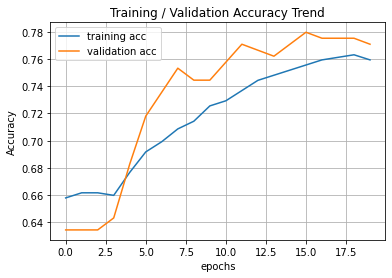

In [8]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list)
plt.plot(validation_accuracy_val_list)
plt.legend(['training acc', 'validation acc'])

plt.show()

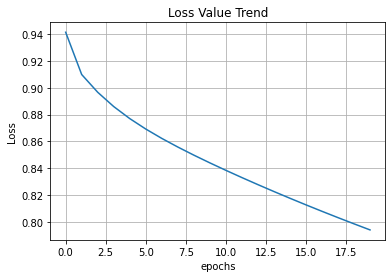

In [9]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

###seperation rate 0.5

In [12]:
test_seperation_rate = 0.5

data_obj2 = DataGeneration('Diabetes','drive/My Drive/AI_INOVATION_SQUARE/prac/(200309)diabetes.csv', test_seperation_rate)

(training_data, test_data) = data_obj2.generate()

print("training data.shape = ",training_data.shape)
print("test data.shape = ",test_data.shape)

Diabetes data generation start!
[DataGeneration] loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 count =  263
[DataGeneration] unique number of original data =  1.0 count =  496
[DataGeneration] unique number of original data =  0.0 ratio =  34.65 %
[DataGeneration] unique number of original data =  1.0 ratio =  65.35 %
[DataGeneration] unique number of training data =  0.0 count =  134
[DataGeneration] unique number of training data =  1.0 count =  246
[DataGeneration] unique number of training data =  0.0 ratio =  35.26 %
[DataGeneration] unique number of training data =  1.0 ratio =  64.74 %
[DataGeneration] unique number of test data =  0.0 count =  129
[DataGeneration] unique number of test data =  1.0 count =  250
[DataGeneration] unique number of test data =  0.0 ratio =  34.04 %
[DataGeneration] unique number of test data =  1.0 ratio =  65.96 %
training data.shape =  (380, 9)
test data.shape =  (379, 9)


In [27]:
#hyper_parameter
i_nodes = training_data.shape[1]-1
h_nodes = 20
o_nodes = 1
learning_rate = 1e-2
epochs = 20

loss_val_list = []
accuracy_val_list = []
validation_accuracy_val_list = []

obj2 = Diabetes('Diabetes',i_nodes,h_nodes,o_nodes,learning_rate)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
  
  for i in range(len(training_data)):

    input_data = training_data[i:,0:-1]
    target_data = training_data[i:,[-1]]

    obj2.train(input_data,target_data)

  cur_loss_val = obj2.feed_forward()

  loss_val_list.append(cur_loss_val)

  (unmatched_list,training_accuracy) = obj2.accuracy(training_data[:,0:-1],training_data[:,[-1]]) 
  (unmatched_list,validation_accuracy) = obj2.accuracy(training_data[:,0:-1],training_data[:,[-1]])

  print("========================================================================")
  print("step = ",step,", current loss value = ",cur_loss_val)
  print("step = ",step,",[training data] accuracy value = ", np.round(100*training_accuracy,4))
  accuracy_val_list.append(training_accuracy)
  print("step = ",step,",[validation data] accuracy value = ",np.round(100*validation_accuracy,4))
  validation_accuracy_val_list.append(validation_accuracy)
print("==========================================================================")

end_time = datetime.now()

print("")
print("Elapsed time =>",end_time-start_time)

Diabetes is created!!!
Neural Network Learning using Numerical Derivative...
step =  0 , current loss value =  0.06517647855775117
step =  0 ,[training data] accuracy value =  75.3289
step =  0 ,[validation data] accuracy value =  75.3289
step =  1 , current loss value =  0.043040217010321395
step =  1 ,[training data] accuracy value =  75.1645
step =  1 ,[validation data] accuracy value =  75.1645
step =  2 , current loss value =  0.03888505939797593
step =  2 ,[training data] accuracy value =  73.6842
step =  2 ,[validation data] accuracy value =  73.6842
step =  3 , current loss value =  0.03493197057389777
step =  3 ,[training data] accuracy value =  74.6711
step =  3 ,[validation data] accuracy value =  74.6711
step =  4 , current loss value =  0.023665707219228425
step =  4 ,[training data] accuracy value =  73.8487
step =  4 ,[validation data] accuracy value =  73.8487
step =  5 , current loss value =  0.013099093007962042
step =  5 ,[training data] accuracy value =  75.4934
ste

In [28]:
accuracy_val_list

[0.7532894736842105,
 0.7516447368421053,
 0.7368421052631579,
 0.7467105263157895,
 0.7384868421052632,
 0.7549342105263158,
 0.743421052631579,
 0.743421052631579,
 0.75,
 0.7549342105263158,
 0.7680921052631579,
 0.774671052631579,
 0.7861842105263158,
 0.8026315789473685,
 0.805921052631579,
 0.8256578947368421,
 0.837171052631579,
 0.8552631578947368,
 0.8717105263157895,
 0.881578947368421]

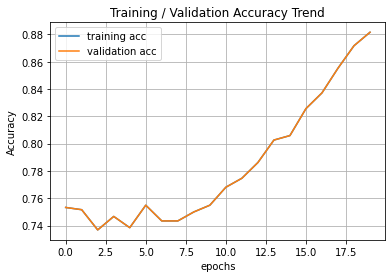

In [31]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list)
plt.plot(validation_accuracy_val_list)
plt.legend(['training acc', 'validation acc'])
 
plt.show()  

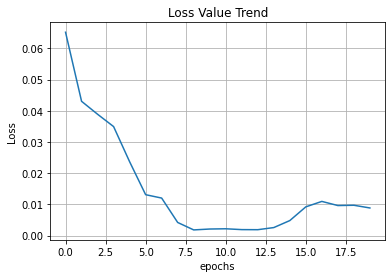

In [32]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

###speration rate = 0.2

In [33]:
test_seperation_rate = 0.2

data_obj2 = DataGeneration('Diabetes','drive/My Drive/AI_INOVATION_SQUARE/prac/(200309)diabetes.csv', test_seperation_rate)

(training_data, test_data) = data_obj2.generate()

print("training data.shape = ",training_data.shape)
print("test data.shape = ",test_data.shape)

Diabetes data generation start!
[DataGeneration] loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 count =  263
[DataGeneration] unique number of original data =  1.0 count =  496
[DataGeneration] unique number of original data =  0.0 ratio =  34.65 %
[DataGeneration] unique number of original data =  1.0 ratio =  65.35 %
[DataGeneration] unique number of training data =  0.0 count =  212
[DataGeneration] unique number of training data =  1.0 count =  396
[DataGeneration] unique number of training data =  0.0 ratio =  34.87 %
[DataGeneration] unique number of training data =  1.0 ratio =  65.13 %
[DataGeneration] unique number of test data =  0.0 count =  51
[DataGeneration] unique number of test data =  1.0 count =  100
[DataGeneration] unique number of test data =  0.0 ratio =  33.77 %
[DataGeneration] unique number of test data =  1.0 ratio =  66.23 %
training data.shape =  (608, 9)
test data.shape =  (151, 9)


In [34]:
#hyper_parameter
i_nodes = training_data.shape[1]-1
h_nodes = 20
o_nodes = 1
learning_rate = 1e-2
epochs = 20

loss_val_list = []
accuracy_val_list = []
validation_accuracy_val_list = []

obj2 = Diabetes('Diabetes',i_nodes,h_nodes,o_nodes,learning_rate)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
  
  for i in range(len(training_data)):

    input_data = training_data[i:,0:-1]
    target_data = training_data[i:,[-1]]

    obj2.train(input_data,target_data)

  cur_loss_val = obj2.feed_forward()

  loss_val_list.append(cur_loss_val)

  (unmatched_list,training_accuracy) = obj2.accuracy(training_data[:,0:-1],training_data[:,[-1]]) 
  (unmatched_list,validation_accuracy) = obj2.accuracy(training_data[:,0:-1],training_data[:,[-1]])

  print("========================================================================")
  print("step = ",step,", current loss value = ",cur_loss_val)
  print("step = ",step,",[training data] accuracy value = ", np.round(100*training_accuracy,4))
  accuracy_val_list.append(training_accuracy)
  print("step = ",step,",[validation data] accuracy value = ",np.round(100*validation_accuracy,4))
  validation_accuracy_val_list.append(validation_accuracy)
print("==========================================================================")

end_time = datetime.now()

print("")
print("Elapsed time =>",end_time-start_time)

Diabetes is created!!!
Neural Network Learning using Numerical Derivative...
step =  0 , current loss value =  0.14977760201436227
step =  0 ,[training data] accuracy value =  76.8092
step =  0 ,[validation data] accuracy value =  76.8092
step =  1 , current loss value =  0.08828669117359733
step =  1 ,[training data] accuracy value =  77.6316
step =  1 ,[validation data] accuracy value =  77.6316
step =  2 , current loss value =  0.04237692782801652
step =  2 ,[training data] accuracy value =  80.9211
step =  2 ,[validation data] accuracy value =  80.9211
step =  3 , current loss value =  0.022921325995632586
step =  3 ,[training data] accuracy value =  82.0724
step =  3 ,[validation data] accuracy value =  82.0724
step =  4 , current loss value =  0.01186338989434252
step =  4 ,[training data] accuracy value =  81.7434
step =  4 ,[validation data] accuracy value =  81.7434
step =  5 , current loss value =  0.006208967764426226
step =  5 ,[training data] accuracy value =  82.2368
step

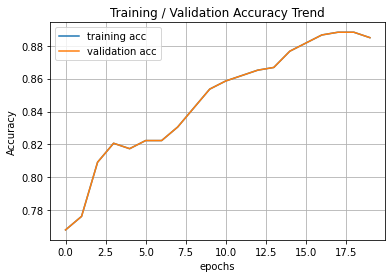

In [35]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list)
plt.plot(validation_accuracy_val_list)
plt.legend(['training acc', 'validation acc'])

plt.show()  

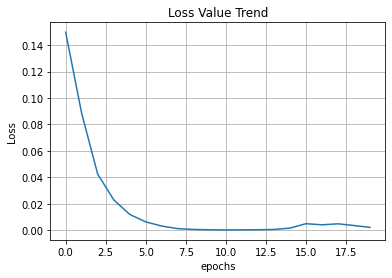

In [36]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()